In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reads in all sheets in Riket / 0

## A)

In [464]:
df_english= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Engelska", skiprows= 8)
df_math= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Matematik", skiprows= 8)
df_swedish= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska", skiprows= 8)
df_swedish2= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Svenska som andraspråk", skiprows= 8)
df_rapport= pd.read_excel("../Data/Data_processing/riket2023_åk9_np.xlsx", sheet_name= "Rapportbeskrivning och def.")
df_english

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [465]:
dfs= {
    "English": df_english,
    "Math": df_math,
    "Swedish": df_swedish,
    "Swedish2": df_swedish2,
    "Report": df_rapport
}
labels= [
    "",
    "",
    "(A-F)",
    "(A-F)",
    "(A-F)",
    "%(A-E)",
    "%(A-E)",
    "%(A-E)",
    "(Poäng)",
    "(Poäng)",
    "(Poäng)"
]
columns_copy= []

for subject in dfs:
    
    for column in dfs[subject].columns:
        dfs[subject][column] = dfs[subject][column].replace("..", 0)
        
    dfs[subject].columns= dfs[subject].columns.str.replace(" "[0:], "")
    dfs[subject]= dfs[subject].rename(columns= {"Typavhuvudman": "Huvudman"})
    columns_copy= dfs[subject].columns.tolist()
    columns_copy= [f"{col}{label}" for col, label in zip(dfs[subject].columns, labels)]
    
    dfs[subject].columns= columns_copy
    
df_english= dfs["English"]
df_math= dfs["Math"]
df_swedish= dfs["Swedish"]
df_swedish2= dfs["Swedish2"]
df_rapport= dfs["Report"]
df_swedish2

C:\Users\milto\AppData\Local\Temp\ipykernel_19920\3370189821.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs[subject][column] = dfs[subject][column].replace("..", 0)


,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12.0,10.4
3,Riket,Skolverket,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Collections

In [466]:
dfs= [
    df_english,
    df_math,
    df_swedish,
    df_swedish2
]
colors = {
    "RED1": "#D60C00",
    "YELLOW1": "#F4D000",
    "BLUE1": "#1400F4",
    "BLUE2": "#00204E",
    "GREEN1": "#4DF400",
    "GRAY1": "#292929"
}
bar_colors = [
    colors["BLUE1"],
    colors["RED1"],
    colors["YELLOW1"],
    colors["GREEN1"]
]
subjects = [
    "English",
    "Math",
    "Swedish",
    "Swedish2"
]
total_points= [df.loc[0, "Totalt(Poäng)"]for df in dfs]

## B)

In [467]:
df_math

,Riket,Huvudman,Totalt(A-F),Flickor(A-F),Pojkar(A-F),Totalt%(A-E),Flickor%(A-E),Pojkar%(A-E),Totalt(Poäng),Flickor(Poäng),Pojkar(Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [468]:
girls_f= round(df_math.loc[0, "Flickor(A-F)"]- df_math.loc[0, "Flickor(A-F)"]* (df_math.loc[0, "Flickor%(A-E)"]/ 100), 2)
boys_f= round(df_math.loc[0, "Pojkar(A-F)"]- df_math.loc[0, "Pojkar(A-F)"]* (df_math.loc[0, "Pojkar%(A-E)"]/ 100), 2)
grades_f= round(girls_f+ boys_f, 2)
grades_f

11622.81

## C)

Text(0.5, 1.0, 'Total subject score in Sweden')

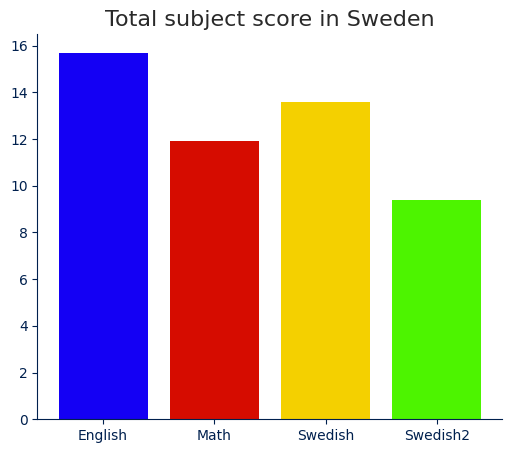

In [469]:
fig, ax= plt.subplots(figsize= (6, 5))
ax.bar(subjects, total_points, color= bar_colors)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.spines["left"].set_color(colors["BLUE2"])
ax.tick_params(colors= colors["BLUE2"])
ax.set_title("Total subject score in Sweden", color= colors["GRAY1"], fontsize= 16)

## D)

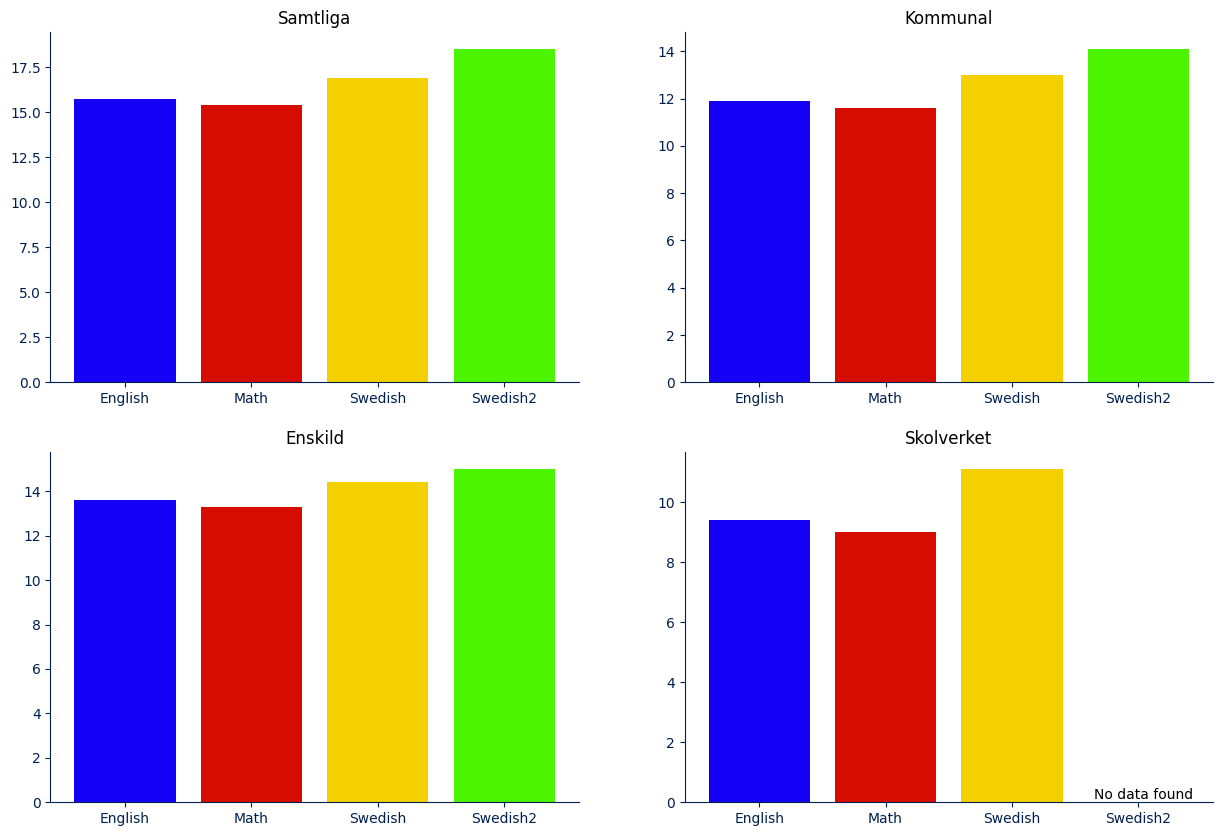

In [470]:
huvudmann= ["Samtliga", "Kommunal", "Enskild", "Skolverket"]
fig, axs= plt.subplots(int(len(huvudmann)/2), int(len(huvudmann)/2), figsize= (15, 10))


for ax, df, huvudman in zip(axs.flatten(), dfs, huvudmann):

    ax.bar(subjects, df["Totalt(Poäng)"], color= bar_colors)
    
    for x, point in enumerate(df["Totalt(Poäng)"]):
        if point <= 0:
            ax.text(x-0.35, 0.1, "No data found")
    ax.set(title= huvudman)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color(colors["BLUE2"])
    ax.spines["left"].set_color(colors["BLUE2"])
    ax.tick_params(colors= colors["BLUE2"])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    

# Betyg och prov / 1

## A)

In [471]:
df_1a_raw= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1A", skiprows= 9)
df_1b_raw= pd.read_excel("../Data/Data_processing/betyg_o_prov_riksnivå.xlsx", sheet_name= "Tabell 1B", skiprows= 7)

In [472]:
categories= [
    "(A-F)",
    "(A-E)",
    "Meritvärde 16 ämnen",
    "Meritvärde 17 ämnen",
    "% elever med som saknar godkänt i ett eller flera ämnen"
]

df_1a= df_1a_raw.rename(columns= {
    "Unnamed: 0": "",
    "Unnamed: 1": "Totalt",
    "Unnamed: 2": "Flickor",
    "Unnamed: 3": "Pojkar",
    "Totalt": "Totalt",
    "Flickor": "Flickor",
    "Pojkar": "Pojkar",
    "Totalt.1": "Totalt",
    "Flickor.1": "Flickor",
    "Pojkar.1": "Pojkar"
    
})
columns_multiindex1a= pd.MultiIndex.from_tuples([
    ("", ""),
    ("Totalt", ""),
    ("Flickor", ""),
    ("Pojkar", ""),
    ("Totalt", categories[0]),
    ("Flickor", categories[0]),
    ("Pojkar", categories[0]),
   ("Totalt", categories[1]),
   ("Flickor", categories[1]),
   ("Pojkar", categories[1])
])
df_1a.columns= columns_multiindex1a
df_1b= df_1b_raw.rename(columns= {
    "Unnamed: 0": "",
    "Totalt": "Totalt"
})
df_1a

,,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
,,,,,(A-F),(A-F),(A-F),(A-E),(A-E),(A-E)
0,2018/19,112731.0,54667.0,58064.0,112280,54430,57850,110663,53757,56906
1,2019/20,115023.0,55670.0,59353.0,114444,55389,59055,112728,54711,58017
2,2020/21,116359.0,56715.0,59644.0,115710,56394,59316,114136,55721,58415
3,2021/22,120525.0,58513.0,62012.0,119891,58207,61684,117935,57312,60623
4,2022/23,121369.0,59043.0,62326.0,120742,58703,62039,118736,57781,60955
5,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kommun,96204.0,46478.0,49726.0,95991,46363,49628,94276,45588,48688
7,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Internationella skolor,213.0,115.0,98.0,.,.,.,.,.,.


In [473]:
df_1b.head()

,,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [474]:
df_1a.head()

,,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
,,,,,(A-F),(A-F),(A-F),(A-E),(A-E),(A-E)
0,2018/19,112731.0,54667.0,58064.0,112280,54430,57850,110663,53757,56906
1,2019/20,115023.0,55670.0,59353.0,114444,55389,59055,112728,54711,58017
2,2020/21,116359.0,56715.0,59644.0,115710,56394,59316,114136,55721,58415
3,2021/22,120525.0,58513.0,62012.0,119891,58207,61684,117935,57312,60623
4,2022/23,121369.0,59043.0,62326.0,120742,58703,62039,118736,57781,60955


In [475]:
total_f= df_1a.loc[0:4, "Totalt1"]* (df_1b.loc[0:4, "Totalt.2"]/ 100)
girls_f= df_1a.loc[0:4, "Flickor1"].values* (df_1b.loc[0:4, "Flickor.2"].values/ 100)
boys_f= df_1a.loc[0:4, "Pojkar1"].values* (df_1b.loc[0:4, "Pojkar.2"].values/ 100)
years= df_1b.loc[0:4, ""].values

KeyError: 'Totalt1'

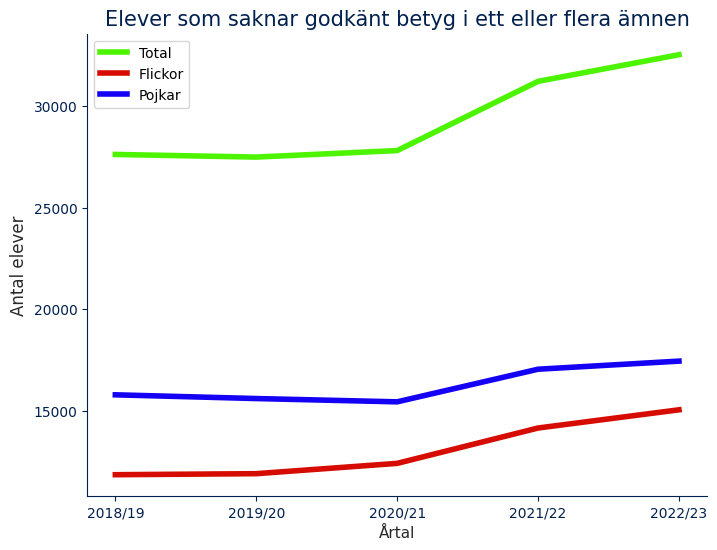

In [ ]:
fig, ax= plt.subplots(figsize= (8, 6))

ax.set_title("Elever som saknar godkänt betyg i ett eller flera ämnen", color= colors["BLUE2"], fontsize= 15)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.spines["left"].set_color(colors["BLUE2"])

ax.tick_params(colors= colors["BLUE2"])

ax.set_xlabel("Årtal", color= colors["GRAY1"], fontsize= 11)
ax.set_ylabel("Antal elever", color= colors["GRAY1"] ,fontsize= 12)

ax.plot(years, total_f, label= "Total", color= colors["GREEN1"], linewidth= 4)
ax.plot(years, girls_f, label= "Flickor", color= colors["RED1"], linewidth= 4)
ax.plot(years, boys_f, label= "Pojkar", color= colors["BLUE1"], linewidth= 4)

ax.legend(loc= "upper left")
plt.show()

## B)

In [ ]:
df_1b

,,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0
5,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
7,Enskild,237.9,245.0,230.8,247.2,254.8,239.7,18.7,18.4,19.0
8,därav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18.0,17.7,18.3


In [ ]:
mean_merit16= df_1b.loc[0:4, "Totalt"].values
girls_merit16= df_1b.loc[0:4, "Flickor"].values
boys_merit16= df_1b.loc[0:4, "Pojkar"].values

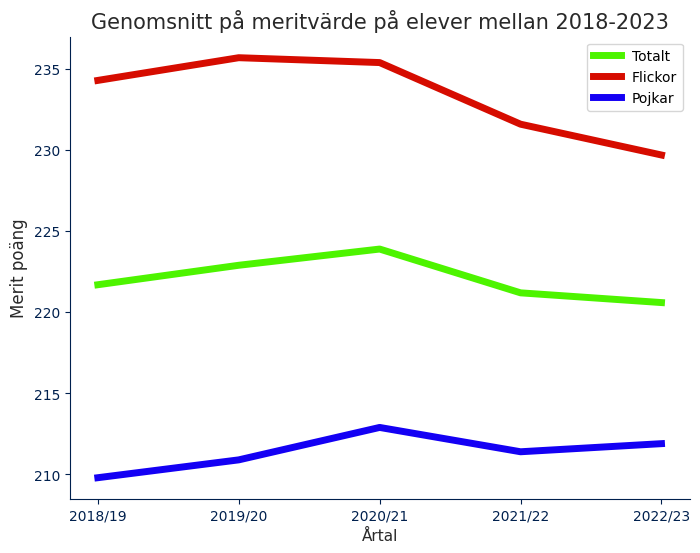

In [ ]:
fig, ax= plt.subplots(figsize= (8, 6))

ax.set_title("Genomsnitt på meritvärde på elever mellan 2018-2023", color= colors["GRAY1"], fontsize= 15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(colors["BLUE2"])
ax.spines["bottom"].set_color(colors["BLUE2"])
ax.tick_params(colors= colors["BLUE2"])
ax.set_xlabel("Årtal", color= colors["GRAY1"], fontsize= 11)
ax.set_ylabel("Merit poäng", color= colors["GRAY1"], fontsize= 12)

ax.plot(years, mean_merit16, label= "Totalt", color= colors["GREEN1"], linewidth= 5)
ax.plot(years, girls_merit16, label= "Flickor", color= colors["RED1"], linewidth= 5)
ax.plot(years, boys_merit16, label= "Pojkar", color= colors["BLUE1"], linewidth= 5)
ax.legend(loc= "upper right")

In [ ]:
swedish_backround_merit = {
    "Totalt": df_1b.loc[21, "Totalt"],
    "Flickor": df_1b.loc[21, "Flickor"],
    "Pojkar": df_1b.iloc[21]
}